# Week 10 Assignment

We had two major areas of discussion this week.  The first was all about how to work with string data - parsing and splitting strings using basic string fuctions as well as more complex string matching using regular expressions.  The second was a basic introduction to Pandas with a few different examples of how to load data into Pandas and then visualize it using graphs (histogram, distribution, scatter, bar, timeseries).

* 36.1 - 1 point
* 36.2 - 1 point
* 38.1 - 3 points

## 36.1 String Manipulation

Write a function that will parse an address that includes one or two parts of street information, a city, a state, and a zip code -- all separated by commas.  You can assume that commas won't appear as part of the address information, only as a delimiter.  Here are some examples:

823 Pebble Street, St. Louis, MO 63105

91 Cityplace, Suite #33, St. Louis, MO 63144

81234 Homeroad, Kansas City, MO 62441


The output you should generate will be a dictionary with the following possible items.

```
{
  'street1': '91 Cityplace',
  'street2': 'Suite #33',
  'city': 'St. Louis',
  'state': 'MO',
  'zip': '63122'
}
```

Declare your function like this:
```
parse_address(address)
```

In [1]:
### YOUR SOLUTION
def parse_address(address):
    '''
    (string)-> dictionary
    address: a string input that follows the following format:
    Street number and name, additional address information (optional), city, state, zip/postal code
    
    This function takes a single string adddress and parses it into a dictionary format
    '''
    x = address.split(",")
    
    if len(x)==4:
        parsed_address= {'street1': x[0],
                       'street2': '', 
                       'city': x[1], 
                       'state': x[2], 
                         'zip': x[3]
                        }
    elif len(x)==5:
        parsed_address= {'street1': x[0],
                       'street2': x[1], 
                       'city': x[2], 
                       'state': x[3], 
                        'zip': x[4]
                        }
    
    else: 
        parsed_address='please check your address format'
    return(parsed_address)
    

## 36.2 Test the Address Parser

Now write a series of good tests to ensure that your addres parser is going to work with a variety of different inputs.  Include at least 5 different examples.

In [2]:
assert(parse_address('823 Pebble Street, St. Louis, MO, 63105')== {'street1': '823 Pebble Street', 'street2': '', 'city': ' St. Louis', 'state': ' MO', 'zip': ' 63105'}
)

assert(parse_address('91 Cityplace, Suite #33, St. Louis, MO, 63144')=={'street1': '91 Cityplace', 'street2': ' Suite #33', 'city': ' St. Louis', 'state': ' MO', 'zip': ' 63144'})

assert(parse_address('81234 Homeroad, Kansas City, MO, 62441')== {'street1': '81234 Homeroad', 'street2': '', 'city': ' Kansas City', 'state': ' MO', 'zip': ' 62441'}
)

assert(parse_address('3545 Lafayette Ave., Attn: Center for Outcomes Research, St. Louis, MO, 63104')=={'street1': '3545 Lafayette Ave.', 'street2': ' Attn: Center for Outcomes Research', 'city': ' St. Louis', 'state': ' MO', 'zip': ' 63104'})

assert(parse_address('St. Louis, MO, 63104')=='please check your address format')


## 38.1 COVID-19 Trend Data

Since we're dealing with a global pandemic right now, probably good to go ahead and do some anlysis with that data.  Take a look at what's here: https://ourworldindata.org/covid-sources-comparison

Near the middle of the page, there are two charts with some data.  On the left is "positive cases" and on the right is "deaths."  Both charts have a button that says "Data."  What you will do below is write a series of Python commands (doesn't need to be in a function) to read that data and produce a simple timeseries chart using the information from John's Hopkins.  Your code will need to read the data, possibly do some reformatting, and then produce a simple timeseries chart.

(Unfortunately, the tools used on this website don't make it easy to link to and directly download the data, so I've placed a copy in `/data/covid19.xlsx` for you to access.  This file came from one of the underlying sources: https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel('/data/covid19.xlsx')
chart_data = pd.DataFrame()
chart_data['Date'] = pd.to_datetime(data['DateRep'], format='%Y-%m-%d')
chart_data['Cases'] = data['Cases'].astype(int)
#chart_data['Deaths'] = data['Deaths'].astype(int)
Covid_data = chart_data.groupby(['Date']).sum()

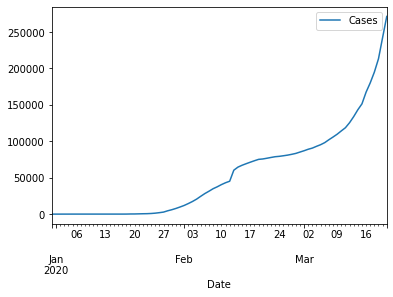

In [5]:
Covid_data.cumsum().plot(style='-')

One hint that you might find helpful while working on this is that the data in this file is the number of cases each week, not the running total.  You will want to plot a running total.

To do so, pandas has a `.cumsum()` method that you can use after doing a `groupby` and a `.sum()` somewhat similar to the last example of the pandas-viz.ipynb file (except in that example, it's doing a `mean()` instead of `sum()` and a `rolling()` instead of `cumsum()`.)  This link might also provide a little guidance: https://stackoverflow.com/questions/48739374/pandas-plot-cumulative-sum-of-counters-over-time

## Extra Challenges

Take the same data, but not start looking at it by country.  Do some groupbys.

Or take the same data and look at the mortality rate (deaths / total reported cases) and see how that is different by country or trending over time.

## Cases by Country (Countries with >100 cases)

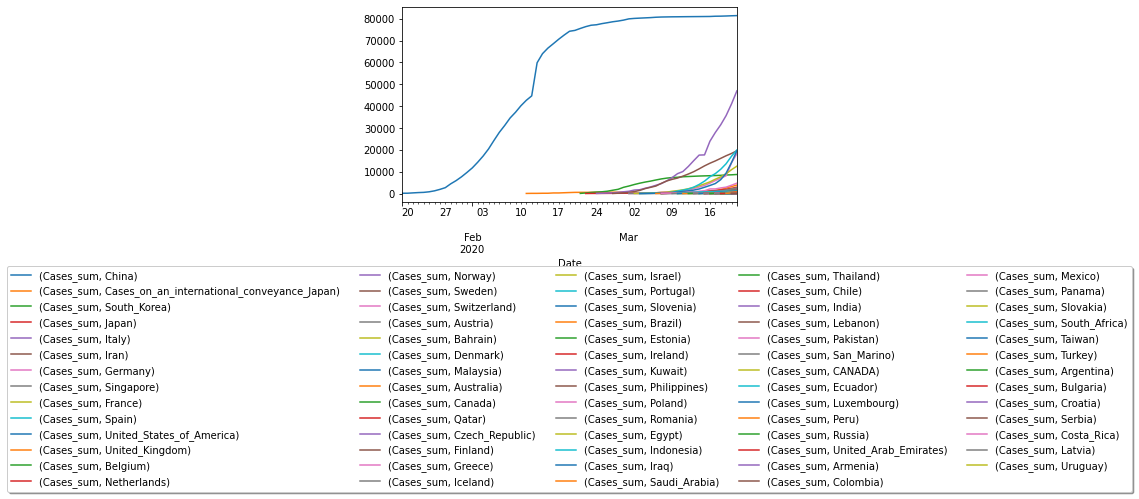

In [6]:
chart_data = pd.DataFrame()
chart_data['Date'] = pd.to_datetime(data['DateRep'], format='%Y-%m-%d')
chart_data['country'] = data['Countries and territories'].astype(str)
chart_data['Cases'] = data['Cases'].astype(int)
#chart_data['Deaths'] = data['Deaths'].astype(int)
Covid_data1 = chart_data.groupby(['Date', 'country']).sum()
Covid_data1=Covid_data1.reset_index()

Covid_data1['Cases_sum'] = Covid_data1.groupby(['country'])['Cases'].cumsum()

del Covid_data1['Cases'] 
Covid_data1=Covid_data1.set_index(['Date', 'country'])

Covid_data2=Covid_data1[Covid_data1['Cases_sum']>100] #100 to limit lines

ax=Covid_data2.unstack().plot(style='-')
## Instructions taken from: 
#      https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -.3),
          fancybox=True, shadow=True, ncol=5)

plt.show()

Paul, 
I am noticing that the visuals of Jupyter are not something I would copy and paste to a presentation
Any tips on making Python charts pretty or other visulization tools that would be better? 
(I am partial to Rmarkdown, but mainly because I can automate PowerPoint slides and PDFs)

## Mortality Rate over Time

In [7]:
chart_data = pd.DataFrame()
chart_data['Date'] = pd.to_datetime(data['DateRep'], format='%Y-%m-%d')
#chart_data['country'] = data['Countries and territories'].astype(str)
chart_data['Cases'] = data['Cases'].astype(int)
chart_data['Deaths'] = data['Deaths'].astype(int)
Covid_data1 = chart_data.groupby(['Date']).sum()
Covid_data1 = Covid_data1.cumsum()

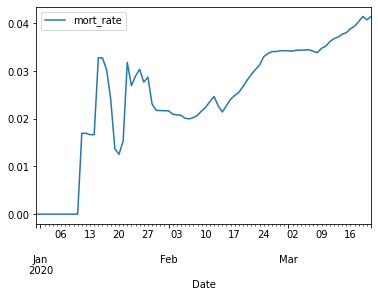

In [8]:
country_chart_data = pd.DataFrame()
Covid_data2=Covid_data1[Covid_data1['Cases']>0]
country_chart_data['mort_rate'] = Covid_data2['Deaths']/Covid_data2['Cases'].astype(float)
country_chart_data.plot()


## Mortality Rate by Country (in countries with deaths >=10)

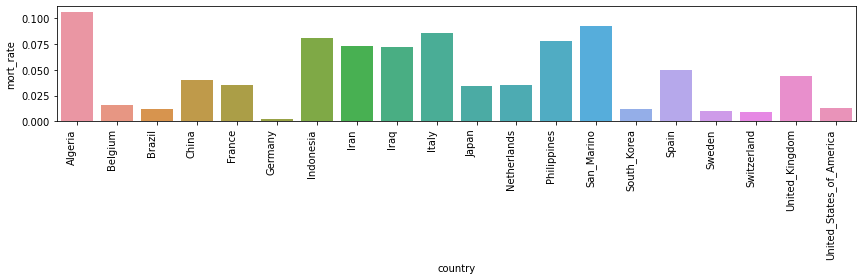

In [9]:
chart_data = pd.DataFrame()
#chart_data['Date'] = pd.to_datetime(data['DateRep'], format='%Y-%m-%d')
chart_data['country'] = data['Countries and territories'].astype(str)
chart_data['Cases'] = data['Cases'].astype(int)
chart_data['Deaths'] = data['Deaths'].astype(int)
Covid_data1 = chart_data.groupby(['country']).sum()


country_chart_data = pd.DataFrame()
Covid_data2=Covid_data1[Covid_data1['Deaths']>=10] #10 chosen as 10 deaths = day one in most measures
country_chart_data['mort_rate'] = Covid_data2['Deaths']/Covid_data2['Cases'].astype(float)
country_chart_data=country_chart_data.reset_index()
Covid_data2=Covid_data2.reset_index()

plt.figure(figsize=(12,4))
Mort_rate=sns.barplot(x="country", y='mort_rate', data=country_chart_data)
Mort_rate.set_xticklabels(Mort_rate.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()